In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2024-12-23 22:00:46.330531: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-23 22:00:46.355624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-23 22:00:46.355658: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-23 22:00:46.356670: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 22:00:46.361714: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

In [4]:
dmlp_mse = Sequential()
dmlp_mse.add(Dense(units=n_hidden1, activation="tanh", input_shape=(n_input,)))
dmlp_mse.add(Dense(units=n_hidden2, activation="tanh"))
dmlp_mse.add(Dense(units=n_hidden3, activation="tanh"))
dmlp_mse.add(Dense(units=n_hidden4, activation="tanh"))
dmlp_mse.add(Dense(units=n_output, activation="softmax"))

dmlp_mse.compile(loss="mean_squared_error", optimizer=Adam(), metrics=['accuracy'])
hist_mse = dmlp_mse.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

2024-12-23 22:00:49.987763: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-23 22:00:50.021494: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-23 22:00:50.021760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/30


2024-12-23 22:00:51.098664: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ccc14c24340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-23 22:00:51.098683: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-23 22:00:51.102525: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-23 22:00:51.112862: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1734958851.170605   15584 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 - 2s - loss: 0.0149 - accuracy: 0.9025 - val_loss: 0.0095 - val_accuracy: 0.9399 - 2s/epoch - 5ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0081 - accuracy: 0.9476 - val_loss: 0.0067 - val_accuracy: 0.9572 - 808ms/epoch - 2ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0062 - accuracy: 0.9601 - val_loss: 0.0066 - val_accuracy: 0.9578 - 796ms/epoch - 2ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0048 - accuracy: 0.9689 - val_loss: 0.0057 - val_accuracy: 0.9638 - 777ms/epoch - 2ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0044 - accuracy: 0.9720 - val_loss: 0.0052 - val_accuracy: 0.9670 - 784ms/epoch - 2ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0040 - accuracy: 0.9747 - val_loss: 0.0050 - val_accuracy: 0.9686 - 790ms/epoch - 2ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0035 - accuracy: 0.9780 - val_loss: 0.0053 - val_accuracy: 0.9677 - 793ms/epoch - 2ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0032 - accuracy: 0.9796 - val_loss: 0.0045 - val_accuracy: 0.9719 - 774ms/epoch - 2ms/step
Epoch 9/30
469

In [5]:
dmlp_ce = Sequential()
dmlp_ce.add(Dense(units=n_hidden1, activation="tanh", input_shape=(n_input,)))
dmlp_ce.add(Dense(units=n_hidden2, activation="tanh"))
dmlp_ce.add(Dense(units=n_hidden3, activation="tanh"))
dmlp_ce.add(Dense(units=n_hidden4, activation="tanh"))
dmlp_ce.add(Dense(units=n_output, activation="softmax"))

dmlp_ce.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train, y_train, batch_size = 128, epochs=30, validation_data=(x_test, y_test), verbose=2)

Epoch 1/30
469/469 - 1s - loss: 0.2613 - accuracy: 0.9199 - val_loss: 0.1357 - val_accuracy: 0.9565 - 1s/epoch - 3ms/step
Epoch 2/30
469/469 - 1s - loss: 0.1221 - accuracy: 0.9621 - val_loss: 0.1125 - val_accuracy: 0.9668 - 783ms/epoch - 2ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0893 - accuracy: 0.9708 - val_loss: 0.1083 - val_accuracy: 0.9674 - 768ms/epoch - 2ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.1015 - val_accuracy: 0.9700 - 788ms/epoch - 2ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0566 - accuracy: 0.9814 - val_loss: 0.0898 - val_accuracy: 0.9736 - 783ms/epoch - 2ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0450 - accuracy: 0.9851 - val_loss: 0.0915 - val_accuracy: 0.9744 - 777ms/epoch - 2ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0365 - accuracy: 0.9878 - val_loss: 0.0913 - val_accuracy: 0.9763 - 785ms/epoch - 2ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0392 - accuracy: 0.9870 - val_loss: 0.1077 - val_accuracy: 0.9703 - 771ms/epoch - 2ms/step
Epo

In [6]:
res_mse = dmlp_mse.evaluate(x_test, y_test, verbose=0)
print(f"acc of mse: {res_mse[1]*100:.2f}%")
res_ce = dmlp_ce.evaluate(x_test, y_test, verbose=0)
print(f"acc of ce: {res_ce[1]*100:.2f}%")

acc of mse: 97.68%
acc of ce: 97.78%


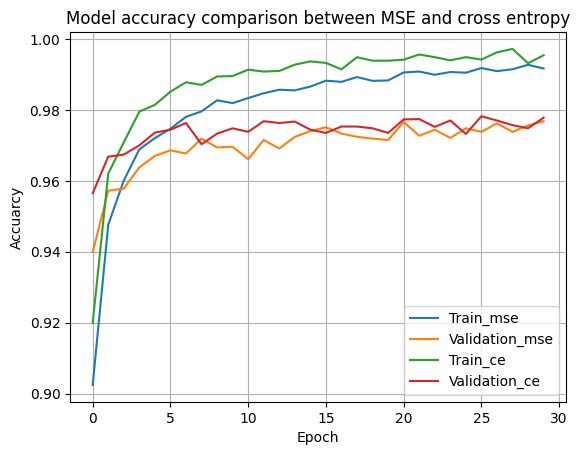

In [7]:
plt.plot(hist_mse.history["accuracy"])
plt.plot(hist_mse.history["val_accuracy"])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])

plt.title("Model accuracy comparison between MSE and cross entropy")
plt.ylabel("Accuarcy")
plt.xlabel("Epoch")
plt.legend(["Train_mse", "Validation_mse", "Train_ce", "Validation_ce"], loc="best")
plt.grid()
plt.show()